In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier
import itertools

In [372]:
file_path = r"C:\Users\kamod\OneDrive\Escritorio\2024-2 U\Intc Soc\modelos-de-interacciones-sociales--main\trabajo final\Datos\Price_Stocks.xlsx"

retorno_df = pd.read_excel(file_path, sheet_name="Retorno")

In [373]:
retorno_df_clean = retorno_df.dropna()
retorno_df_clean.loc[:, 'Exchange Date'] = pd.to_datetime(retorno_df_clean['Exchange Date'], errors='coerce')
retorno_df_clean = retorno_df_clean.set_index('Exchange Date')
retorno_df_clean = retorno_df_clean.select_dtypes(include=['float64', 'int64'])

# Sort data by Exchange Date in ascending order
retorno_df_clean = retorno_df_clean.sort_index()

In [374]:
retorno_df_clean = retorno_df_clean.iloc[200:]
retorno_df_clean


,AAP,AAPL,AXP,AZO,CPB,CSCO,CVX,DUK,DXC,EMR,...,MDLZ,MU,NTRZ,ORCL,PG,RTX,SLB,URI,V,VLO
Exchange Date,,,,,,,,,,,,,,,,,,,,,
2010-10-20,0.012585,0.003360,0.010749,0.010590,0.006385,0.018720,0.014857,0.006791,0.007763,0.023124,...,0.011129,0.053425,-0.007507,-0.016821,0.003007,0.004211,0.018213,0.100000,0.025403,0.006098
2010-10-21,-0.002289,-0.003252,0.013592,-0.002285,0.001379,-0.005983,0.002737,0.001686,0.001014,0.015191,...,0.000629,-0.024707,-0.030867,0.006285,0.002209,0.014205,0.000311,0.040909,-0.004024,-0.025344
2010-10-22,0.006392,-0.006623,-0.030792,0.014479,0.001928,0.009458,0.003561,-0.002245,0.008303,-0.005292,...,0.002514,0.025333,0.008437,0.005985,-0.001732,-0.000400,0.053802,0.008188,0.001136,-0.002261
2010-10-25,0.011075,0.004456,0.006918,0.001704,-0.002750,0.005537,0.003785,-0.000562,-0.005624,0.008072,...,0.017868,0.015605,0.004392,-0.005260,0.002208,0.000934,0.011214,0.021115,0.016900,0.006799
2010-10-26,-0.003544,-0.002558,0.020356,0.005869,0.001379,-0.009106,0.003299,0.005065,0.000808,-0.002912,...,-0.004312,-0.011524,0.053103,-0.007282,-0.010702,-0.004533,0.008463,-0.013786,-0.007441,0.012943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23,-0.023226,-0.021623,-0.004295,0.007724,-0.008446,-0.005654,-0.002915,0.005756,-0.019062,-0.008860,...,-0.011072,-0.025691,0.070153,-0.012606,-0.000707,0.013383,0.004770,-0.015670,-0.003617,-0.020780
2024-10-24,-0.015059,-0.000823,-0.004609,-0.013546,0.000639,-0.005686,-0.000199,-0.012856,-0.006477,-0.002304,...,-0.008645,0.017135,0.002731,0.007395,0.000236,-0.016036,-0.020888,-0.011017,-0.001903,-0.011513
2024-10-25,-0.014485,0.003643,-0.009741,-0.007069,0.001702,-0.003931,0.002393,-0.015208,-0.003511,-0.001201,...,-0.010293,0.009920,-0.025294,-0.004932,-0.008254,-0.000080,0.011879,-0.015140,-0.005261,0.007917


In [375]:
num_stocks = 12
step_size = 0.5

# Generate all possible combinations of weights
possible_weights = np.arange(0, 1 + step_size, step_size)  # [0.0, 0.1, ..., 1.0]
combinations = itertools.product(possible_weights, repeat=num_stocks)

In [376]:
# Filter combinations where the sum of weights equals 1
valid_combinations = [weights for weights in combinations if np.isclose(sum(weights), 1)]
weights_df = pd.DataFrame(valid_combinations, columns=[f'Stock_{i+1}' for i in range(num_stocks)])
len(valid_combinations)

78

In [377]:
weights_df.head()

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,Stock_11,Stock_12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0


# Calcular matriz de retornos para cada portafolio

In [378]:
relevant_returns = retorno_df_clean.iloc[:, :num_stocks] 

In [379]:
relevant_returns

,AAP,AAPL,AXP,AZO,CPB,CSCO,CVX,DUK,DXC,EMR,EQT,FDX
Exchange Date,,,,,,,,,,,,
2010-10-20,0.012585,0.003360,0.010749,0.010590,0.006385,0.018720,0.014857,0.006791,0.007763,0.023124,0.003433,0.020427
2010-10-21,-0.002289,-0.003252,0.013592,-0.002285,0.001379,-0.005983,0.002737,0.001686,0.001014,0.015191,-0.016316,-0.003936
2010-10-22,0.006392,-0.006623,-0.030792,0.014479,0.001928,0.009458,0.003561,-0.002245,0.008303,-0.005292,0.001070,0.003274
2010-10-25,0.011075,0.004456,0.006918,0.001704,-0.002750,0.005537,0.003785,-0.000562,-0.005624,0.008072,0.001336,0.007878
2010-10-26,-0.003544,-0.002558,0.020356,0.005869,0.001379,-0.009106,0.003299,0.005065,0.000808,-0.002912,-0.008273,0.000893
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23,-0.023226,-0.021623,-0.004295,0.007724,-0.008446,-0.005654,-0.002915,0.005756,-0.019062,-0.008860,0.006116,-0.006449
2024-10-24,-0.015059,-0.000823,-0.004609,-0.013546,0.000639,-0.005686,-0.000199,-0.012856,-0.006477,-0.002304,0.021277,0.017982
2024-10-25,-0.014485,0.003643,-0.009741,-0.007069,0.001702,-0.003931,0.002393,-0.015208,-0.003511,-0.001201,0.014069,-0.002749


In [380]:
# Initialize an empty list to store portfolio returns for all portfolios
portfolio_returns_manual = []
contador = 0
# Loop through each portfolio (row) in weights_df
for portfolio_index, weights in weights_df.iterrows():
    # List to store returns for the current portfolio
    portfolio_return_for_dates = []
    # Loop through each date (row) in retorno_df_clean (use only first 5 columns)
    for _, daily_returns in relevant_returns.iterrows():
        # Calculate portfolio return for the current date
        portfolio_return = sum(daily_returns.values * weights.values)
        portfolio_return_for_dates.append(portfolio_return)
    
    # Append the portfolio returns for this portfolio
    portfolio_returns_manual.append(portfolio_return_for_dates)

    # Convert the results into a DataFrame
portfolio_returns_manual_df = pd.DataFrame(
    np.array(portfolio_returns_manual).T,  # Transpose to align dates with portfolios
    index=relevant_returns.index,          # Use the same index as retorno_df_clean
    columns=[f"Portfolio_{i}" for i in range(len(weights_df))]
)

# Display the resulting portfolio returns DataFrame
print(portfolio_returns_manual_df.head())

               Portfolio_0  Portfolio_1  Portfolio_2  Portfolio_3  \
Exchange Date                                                       
2010-10-20        0.020427     0.011930     0.003433     0.021775   
2010-10-21       -0.003936    -0.010126    -0.016316     0.005627   
2010-10-22        0.003274     0.002172     0.001070    -0.001009   
2010-10-25        0.007878     0.004607     0.001336     0.007975   
2010-10-26        0.000893    -0.003690    -0.008273    -0.001009   

               Portfolio_4  Portfolio_5  Portfolio_6  Portfolio_7  \
Exchange Date                                                       
2010-10-20        0.013278     0.023124     0.014095     0.005598   
2010-10-21       -0.000562     0.015191    -0.001461    -0.007651   
2010-10-22       -0.002111    -0.005292     0.005789     0.004687   
2010-10-25        0.004704     0.008072     0.001127    -0.002144   
2010-10-26       -0.005593    -0.002912     0.000851    -0.003733   

               Portfolio_8  Port

In [381]:
portfolio_returns_manual_df.mean()

Portfolio_0     0.000505
Portfolio_1     0.000527
Portfolio_2     0.000549
Portfolio_3     0.000425
Portfolio_4     0.000447
                  ...   
Portfolio_73    0.000136
Portfolio_74    0.000473
Portfolio_75    0.000403
Portfolio_76    0.000559
Portfolio_77    0.000098
Length: 78, dtype: float64

In [382]:
import numpy as np
from scipy.stats import beta
import pandas as pd

def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T).

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario=  returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos=[]

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t=returns_binario.iloc[0:t-1, k]  # Retorna lo mas que pueda
            else:
                ventana_reward_t=returns_binario.iloc[t-w-1:t-1, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero (ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values)- alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
            
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k])/2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderacion
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)
        

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K): #acá actualizó tanto el que disparo como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] =  gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Simular DataFrame con tus retornos (cargar tus datos reales aquí)
returns = portfolio_returns_manual_df

# Parámetros del algoritmo
gamma = 0.8  # Factor de descuento
w = 1000  # Tamaño de la ventana deslizante

# Ejecutar el algoritmo
actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)

# Resultados
print("Portafolios seleccionados cada día:", actions)
#print("Retornos observados:", observed_rewards)
print("eventos:", eventos)
numero_de_unos = eventos.count(1)
print(" numero aciertos:", numero_de_unos)

Portafolios seleccionados cada día: [np.int64(49), np.int64(15), np.int64(36), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(77), np.int64(5), np.int64(77), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(9), np.int64(5), np.int64(5), np.int64(6), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(

In [383]:
observed_rewards_df = pd.DataFrame(observed_rewards)

# Start with initial wealth of 1 dollar
initial_wealth = 1

# Create an empty DataFrame to hold the wealth over time for each portfolio
wealth = pd.DataFrame(index=observed_rewards_df.index, columns=observed_rewards_df.columns)

# Iterate over each portfolio (column)
for portfolio in observed_rewards_df.columns:
    # Compute cumulative wealth for each portfolio
    wealth[portfolio] = (1 + observed_rewards_df[portfolio]).cumprod() * initial_wealth

In [384]:
wealth

,0
0,1.008770
1,1.008165
2,1.017114
3,1.025324
4,1.022339
...,...
3525,1.099492
3526,1.122885
3527,1.138684
3528,1.133519


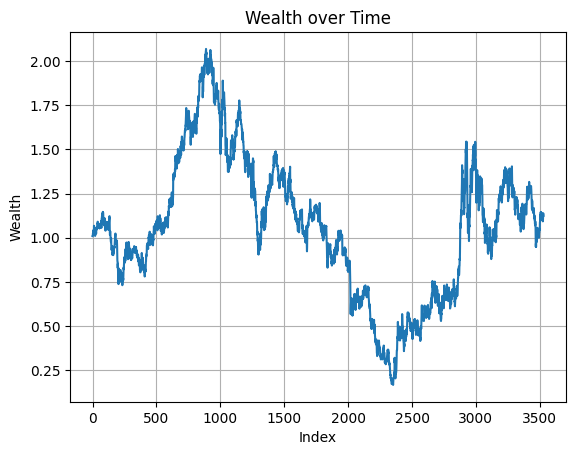

In [385]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the wealth data
plt.plot(wealth)
plt.title('Wealth over Time')
plt.xlabel('Index')
plt.ylabel('Wealth')
plt.grid(True)
plt.show()


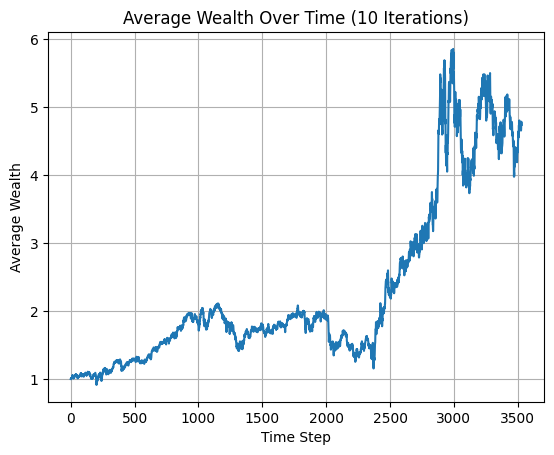

In [386]:
num_iterations = 30
initial_wealth = 1

gamma = 0.8
w = 200
# Create an empty DataFrame to store all wealth matrices for each iteration
all_wealth = pd.DataFrame()
all_returns = pd.DataFrame()
num_ones = []

# Repeat the process 100 times
for i in range(num_iterations):
    # Run the Thompson Sampling to get actions, observed rewards, and events
    actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)
    num_ones.append(np.sum(eventos))
    
    # Convert observed_rewards to a DataFrame
    observed_rewards_df = pd.DataFrame(observed_rewards)
    
    # Create an empty DataFrame to hold the wealth over time for each portfolio
    wealth = pd.DataFrame(index=observed_rewards_df.index, columns=observed_rewards_df.columns)
    
    # Iterate over each portfolio (column)
    for portfolio in observed_rewards_df.columns:
        # Compute cumulative wealth for each portfolio
        wealth[portfolio] = (1 + observed_rewards_df[portfolio]).cumprod() * initial_wealth
    
    # Add the wealth matrix for this iteration to the all_wealth DataFrame
    all_wealth = pd.concat([all_wealth, wealth], axis=1, ignore_index=True)
    all_returns = pd.concat([all_returns, observed_rewards_df.mean(axis=1)], axis=1)


# Calculate the average wealth per row across all iterations
average_wealth = all_wealth.mean(axis=1)
average_wealth = np.insert(average_wealth, 0, 1)

returns_average = all_returns.mean(axis=1)
average_num_ones = np.mean(num_ones)
# Plot the average wealth over time
plt.plot(average_wealth)
plt.title('Average Wealth Over Time (10 Iterations)')
plt.xlabel('Time Step')
plt.ylabel('Average Wealth')
plt.grid(True)
plt.show()

In [393]:
file_name = 'average_wealth.xlsx'
df_existing = pd.read_excel(file_name, index_col=None)
df_existing['Combinatorial'] = average_wealth
df_existing.to_excel(file_name, index=False)
new_index = pd.Index(['2010-10-19'] + list(retorno_df_clean.index))
df_existing['Dates'] = new_index
df_existing.to_excel(file_name, index=False)

In [ ]:
file_name = 'returns_average.xlsx'
df_existing = pd.read_excel(file_name, index_col=None)
df_existing['Combinatorial'] = returns_average
df_existing.to_excel(file_name, index=False)
new_index = list(retorno_df_clean.index)
df_existing['Dates'] = new_inde
df_existing.to_excel(file_name, index=False)

In [392]:
print(average_num_ones)
print(3531*(1/len(valid_combinations)))

544.4333333333333
45.26923076923077
